# 2.1

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import radians, cos, sin, asin, sqrt
import folium
import datetime
from sklearn.cluster import KMeans
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('Report_C1.csv')

Добавление расстояния по прямой до пункта назначения.

In [4]:
def distance(df):
    lat1, lon1, lat2, lon2 = df.pickup_latitude, df.pickup_longitude, df.dropoff_latitude, df.dropoff_longitude 
    R = 3959.87433 #hрадиус земли в милях
    dLat = radians(lat2 - lat1)
    dLon = radians(lon2 - lon1)
    lat1 = radians(lat1)
    lat2 = radians(lat2)
    a = sin(dLat/2)**2 + cos(lat1)*cos(lat2)*sin(dLon/2)**2
    c = 2*asin(sqrt(a))
    return R * c

df['distance_line_km'] = df.apply(lambda x: distance(x), axis = 1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82101 entries, 0 to 82100
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             82101 non-null  int64  
 1   pickup_datetime        82101 non-null  object 
 2   dropoff_datetime       82101 non-null  object 
 3   passenger_count        82101 non-null  int64  
 4   pickup_longitude       82101 non-null  float64
 5   pickup_latitude        82101 non-null  float64
 6   dropoff_longitude      82101 non-null  float64
 7   dropoff_latitude       82101 non-null  float64
 8   trip_duration          82101 non-null  int64  
 9   maximum temperature    82101 non-null  int64  
 10  minimum temperature    82101 non-null  int64  
 11  average temperature    82101 non-null  float64
 12  precipitation          82101 non-null  object 
 13  snow fall              82101 non-null  object 
 14  snow depth             82101 non-null  object 
 15  ma

Добавление временных периодов.

In [6]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])
df['periods'] = (((df['pickup_datetime'].dt.hour*60 + df['pickup_datetime'].dt.minute))/10).round()
df

,Unnamed: 0,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,maximum temperature,minimum temperature,average temperature,precipitation,snow fall,snow depth,maximum temperature C,minimum temperature C,average temperature C,distance_line_km,periods
0,0,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,455,51,40,45.5,0.29,0.0,0,11.0,4.0,8.0,0.931401,104.0
1,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,1346,51,40,45.5,0.29,0.0,0,11.0,4.0,8.0,1.225818,84.0
2,2,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,695,51,40,45.5,0.29,0.0,0,11.0,4.0,8.0,1.564463,90.0
3,3,2016-03-14 04:24:36,2016-03-14 04:37:11,3,-73.944359,40.714489,-73.910530,40.709492,755,51,40,45.5,0.29,0.0,0,11.0,4.0,8.0,1.805540,26.0
4,4,2016-03-14 14:57:56,2016-03-14 15:15:26,1,-73.952881,40.766468,-73.978630,40.761921,1050,51,40,45.5,0.29,0.0,0,11.0,4.0,8.0,1.384027,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82096,82096,2016-05-05 19:20:00,2016-05-05 19:42:00,1,-73.863770,40.770161,-73.744225,40.732197,1334,57,46,51.5,0.00,0.0,0,14.0,8.0,11.0,6.786669,116.0
82097,82097,2016-05-05 20:56:00,2016-05-05 21:10:00,1,-73.981003,40.747387,-73.871025,40.774174,865,57,46,51.5,0.00,0.0,0,14.0,8.0,11.0,6.047558,126.0
82098,82098,2016-05-05 19:42:00,2016-05-05 19:54:00,1,-73.997696,40.757000,-73.975121,40.788696,751,57,46,51.5,0.00,0.0,0,14.0,8.0,11.0,2.488969,118.0
82099,82099,2016-06-30 23:42:19,2016-07-01 00:01:12,1,-73.994049,40.756538,-74.007645,40.708820,1133,46,31,38.5,0.00,0.0,0,8.0,-1.0,4.0,3.373916,142.0


Добавление периодов дня, то есть ночь день и тп.

In [13]:
def period_of_day(x):
    if x.hour >= 4 and x.hour <= 10:
        return 'morning'
    elif x.hour >= 10 and x.hour <= 16:
        return 'day'
    elif x.hour >= 16 and x.hour <= 22:
        return 'evening'
    elif x.hour > 22 or x.hour < 4:
        return 'night'
    
df['pickup_period']=df['pickup_datetime'].apply(lambda x :period_of_day(datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").time()) )
df['dropoff_period']=df['dropoff_datetime'].apply(lambda x :period_of_day(datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").time()) )
df

,Unnamed: 0,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,maximum temperature,...,snow depth,maximum temperature C,minimum temperature C,average temperature C,distance_line_km,periods,pickup_period,dropoff_period,KMean,KMean2
0,0,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,455,51,...,0,11.0,4.0,8.0,0.931401,104.0,evening,evening,5,3
1,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,1346,51,...,0,11.0,4.0,8.0,1.225818,84.0,day,day,1,3
2,2,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,695,51,...,0,11.0,4.0,8.0,1.564463,90.0,day,day,8,6
3,3,2016-03-14 04:24:36,2016-03-14 04:37:11,3,-73.944359,40.714489,-73.910530,40.709492,755,51,...,0,11.0,4.0,8.0,1.805540,26.0,morning,morning,7,7
4,4,2016-03-14 14:57:56,2016-03-14 15:15:26,1,-73.952881,40.766468,-73.978630,40.761921,1050,51,...,0,11.0,4.0,8.0,1.384027,90.0,day,day,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82096,82096,2016-05-05 19:20:00,2016-05-05 19:42:00,1,-73.863770,40.770161,-73.744225,40.732197,1334,57,...,0,14.0,8.0,11.0,6.786669,116.0,evening,evening,0,4
82097,82097,2016-05-05 20:56:00,2016-05-05 21:10:00,1,-73.981003,40.747387,-73.871025,40.774174,865,57,...,0,14.0,8.0,11.0,6.047558,126.0,evening,evening,8,0
82098,82098,2016-05-05 19:42:00,2016-05-05 19:54:00,1,-73.997696,40.757000,-73.975121,40.788696,751,57,...,0,14.0,8.0,11.0,2.488969,118.0,evening,evening,8,5
82099,82099,2016-06-30 23:42:19,2016-07-01 00:01:12,1,-73.994049,40.756538,-74.007645,40.708820,1133,46,...,0,8.0,-1.0,4.0,3.373916,142.0,night,night,8,2


# 2.2

Кластеризация геокоординат, по участкам.

In [8]:
X = np.array(df[['pickup_longitude', 'pickup_latitude']], dtype='float64')
k = 10
model = KMeans(n_clusters=k, random_state=17).fit(X)
pred = model.predict(X)
df['KMean'] = pred
df

,Unnamed: 0,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,maximum temperature,...,snow fall,snow depth,maximum temperature C,minimum temperature C,average temperature C,distance_line_km,periods,pickup_period,dropoff_period,KMean
0,0,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,455,51,...,0.0,0,11.0,4.0,8.0,0.931401,104.0,evening,evening,5
1,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,1346,51,...,0.0,0,11.0,4.0,8.0,1.225818,84.0,day,day,1
2,2,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,695,51,...,0.0,0,11.0,4.0,8.0,1.564463,90.0,day,day,8
3,3,2016-03-14 04:24:36,2016-03-14 04:37:11,3,-73.944359,40.714489,-73.910530,40.709492,755,51,...,0.0,0,11.0,4.0,8.0,1.805540,26.0,morning,morning,7
4,4,2016-03-14 14:57:56,2016-03-14 15:15:26,1,-73.952881,40.766468,-73.978630,40.761921,1050,51,...,0.0,0,11.0,4.0,8.0,1.384027,90.0,day,day,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82096,82096,2016-05-05 19:20:00,2016-05-05 19:42:00,1,-73.863770,40.770161,-73.744225,40.732197,1334,57,...,0.0,0,14.0,8.0,11.0,6.786669,116.0,evening,evening,0
82097,82097,2016-05-05 20:56:00,2016-05-05 21:10:00,1,-73.981003,40.747387,-73.871025,40.774174,865,57,...,0.0,0,14.0,8.0,11.0,6.047558,126.0,evening,evening,8
82098,82098,2016-05-05 19:42:00,2016-05-05 19:54:00,1,-73.997696,40.757000,-73.975121,40.788696,751,57,...,0.0,0,14.0,8.0,11.0,2.488969,118.0,evening,evening,8
82099,82099,2016-06-30 23:42:19,2016-07-01 00:01:12,1,-73.994049,40.756538,-74.007645,40.708820,1133,46,...,0.0,0,8.0,-1.0,4.0,3.373916,142.0,None,None,8


In [9]:
X2 = np.array(df[['dropoff_longitude', 'dropoff_latitude']], dtype='float64')
k = 10
model2 = KMeans(n_clusters=k, random_state=17).fit(X)
pred2 = model2.predict(X2)
df['KMean2'] = pred2
df

,Unnamed: 0,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,maximum temperature,...,snow depth,maximum temperature C,minimum temperature C,average temperature C,distance_line_km,periods,pickup_period,dropoff_period,KMean,KMean2
0,0,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,455,51,...,0,11.0,4.0,8.0,0.931401,104.0,evening,evening,5,3
1,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,1346,51,...,0,11.0,4.0,8.0,1.225818,84.0,day,day,1,3
2,2,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,695,51,...,0,11.0,4.0,8.0,1.564463,90.0,day,day,8,6
3,3,2016-03-14 04:24:36,2016-03-14 04:37:11,3,-73.944359,40.714489,-73.910530,40.709492,755,51,...,0,11.0,4.0,8.0,1.805540,26.0,morning,morning,7,7
4,4,2016-03-14 14:57:56,2016-03-14 15:15:26,1,-73.952881,40.766468,-73.978630,40.761921,1050,51,...,0,11.0,4.0,8.0,1.384027,90.0,day,day,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82096,82096,2016-05-05 19:20:00,2016-05-05 19:42:00,1,-73.863770,40.770161,-73.744225,40.732197,1334,57,...,0,14.0,8.0,11.0,6.786669,116.0,evening,evening,0,4
82097,82097,2016-05-05 20:56:00,2016-05-05 21:10:00,1,-73.981003,40.747387,-73.871025,40.774174,865,57,...,0,14.0,8.0,11.0,6.047558,126.0,evening,evening,8,0
82098,82098,2016-05-05 19:42:00,2016-05-05 19:54:00,1,-73.997696,40.757000,-73.975121,40.788696,751,57,...,0,14.0,8.0,11.0,2.488969,118.0,evening,evening,8,5
82099,82099,2016-06-30 23:42:19,2016-07-01 00:01:12,1,-73.994049,40.756538,-74.007645,40.708820,1133,46,...,0,8.0,-1.0,4.0,3.373916,142.0,None,None,8,2


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='trip_duration', ylabel='Density'>

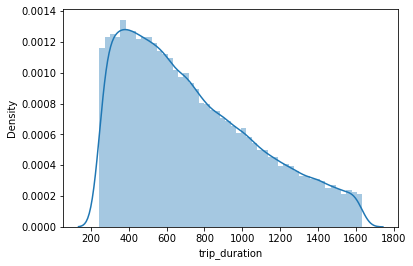

In [10]:
sns.distplot(df['trip_duration'], kde = True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='trip_duration', ylabel='Density'>

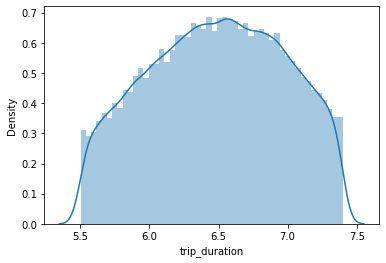

In [11]:
sns.distplot(np.log(df['trip_duration']), kde = True)

<AxesSubplot:xlabel='trip_duration', ylabel='pickup_period'>

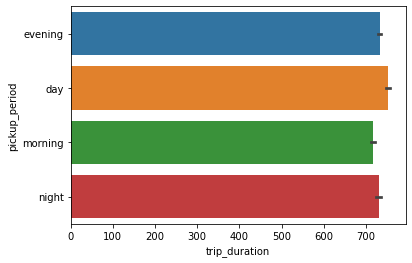

In [14]:
y = df['pickup_period']
x = df['trip_duration']
sns.barplot(x=x, y=y)

<AxesSubplot:xlabel='trip_duration', ylabel='dropoff_period'>

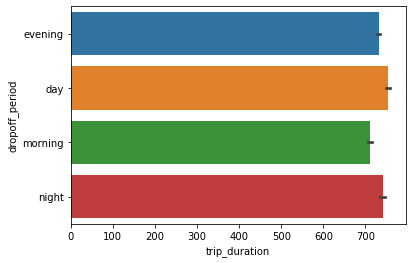

In [15]:
y = df['dropoff_period']
x = df['trip_duration']
sns.barplot(x=x, y=y)